#                    Early prediction of college attrition using Data Mining

## Import the libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/student attrition

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/student attrition


## Read the dataset using pandas library

In [4]:
data=pd.read_excel("Student.xlsx")

In [5]:
data.shape

(3400, 56)

## Print the first five rows from the dataset

In [6]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


## Calculate the number of null values in every features in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [8]:
data.isna().sum()

,0
STUDENT IDENTIFIER,0
STDNT_AGE,0
STDNT_GENDER,0
STDNT_BACKGROUND,0
IN_STATE_FLAG,0
INTERNATIONAL_STS,0
STDNT_MAJOR,0
STDNT_MINOR,0
STDNT_TEST_ENTRANCE1,2294
STDNT_TEST_ENTRANCE2,908


## Print the features names in the dataset

In [9]:
data.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_

## Replace the year with month into only year because the month is repeated in all dataset

In [10]:
data['FIRST_TERM']=data['FIRST_TERM'].replace({200508:2005, 200608:2006, 200708:2007, 200808:2008, 200908:2009, 201008:2010})

In [11]:
data['SECOND_TERM']=data['SECOND_TERM'].replace({200602:2006, 200702:2007, 200802:2008, 200902:2009, 201002:2010, 201102:2011})

In [12]:
data.iloc[:,15:25]

,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM
0,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,2008
1,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,2009
2,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,2011
3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
4,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...
3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
3397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011


## Calculate the number of student that returned in the second year and the other that are not returned

In [13]:
data['RETURNED_2ND_YR'].value_counts()

,count
RETURNED_2ND_YR,
1,2677
0,723


## Fill the empty values of FATHER_HI_EDU_CD and MOTHER_HI_EDU_CD with zeros because they are not availabe

In [14]:
#Replacing all of them with a new value 0.0 as they dont provide any info
data['FATHER_HI_EDU_CD']=data['FATHER_HI_EDU_CD'].fillna(0.0)
data['MOTHER_HI_EDU_CD']=data['MOTHER_HI_EDU_CD'].fillna(0.0)

## We can represnt the first term hours by dividing the two features (FIRST_TERM_EARNED_HRS , FIRST_TERM_ATTEMPT_HRS)

In [15]:
data['FIRST_TERM_Hr']=data['FIRST_TERM_EARNED_HRS']/data['FIRST_TERM_ATTEMPT_HRS']
data['SECOND_TERM_Hr']=data['SECOND_TERM_EARNED_HRS']/data['SECOND_TERM_ATTEMPT_HRS']

# from the next features we can take only the characters from the feature value So we apply slicinf
##  Example  ECON 2105   ==> ECON


In [16]:
data['CORE_COURSE_NAME_1_F']=data['CORE_COURSE_NAME_1_F'].str.slice(0,4)
data['CORE_COURSE_NAME_2_F']=data['CORE_COURSE_NAME_2_F'].str.slice(0,4)
data['CORE_COURSE_NAME_3_F']=data['CORE_COURSE_NAME_3_F'].str.slice(0,4)

data['CORE_COURSE_NAME_1_S']=data['CORE_COURSE_NAME_1_S'].str.slice(0,4)
data['CORE_COURSE_NAME_2_S']=data['CORE_COURSE_NAME_2_S'].str.slice(0,4)
data['CORE_COURSE_NAME_3_S']=data['CORE_COURSE_NAME_3_S'].str.slice(0,4)

## We can drop te next features from the dataset as it's not valuable to the modeling
### X contains the training data

In [17]:
X=data.drop(['STUDENT IDENTIFIER','CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F',
             'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F',
             'CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_5_S',
             'CORE_COURSE_GRADE_6_S','CORE_COURSE_NAME_6_S','RETURNED_2ND_YR','FIRST_TERM_ATTEMPT_HRS',
             'FIRST_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','FATHER_HI_EDU_CD',
             'MOTHER_HI_EDU_CD','DEGREE_GROUP_CD','CORE_COURSE_NAME_3_F',
             'CORE_COURSE_GRADE_3_F','CORE_COURSE_NAME_3_S',
             'CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_4_F',
             'CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_4_S',
             'CORE_COURSE_GRADE_4_S','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_1_S','HIGH_SCHL_NAME'],axis=1)


In [18]:
X.shape

(3400, 28)

In [19]:
X.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_GRADE_1_F',
       'CORE_COURSE_GRADE_2_F', 'SECOND_TERM', 'CORE_COURSE_GRADE_1_S',
       'CORE_COURSE_GRADE_2_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC',
       'DEGREE_GROUP_DESC', 'GROSS_FIN_NEED', 'COST_OF_ATTEND',
       'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'FIRST_TERM_Hr',
       'SECOND_TERM_Hr'],
      dtype='object')

In [20]:
X[:3]


,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,FIRST_TERM_Hr,SECOND_TERM_Hr
0,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,...,4.00,No Information,No Information,Bachelors,0,0,0,0.0,1.0,1.0
1,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,...,2.89,College/Beyond,College/Beyond,Bachelors,570000,1355760,785760,459300.0,1.0,1.0
2,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,...,3.39,High School,Other/Unknown,Bachelors,0,0,0,0.0,1.0,1.0


## y contain the actual out put of the training data

In [21]:
y=data['RETURNED_2ND_YR']

## Print the first five rows from the training data

In [22]:
X['UNMET_NEED']=X['UNMET_NEED'].fillna(0)

In [23]:
X['GROSS_FIN_NEED']=X['GROSS_FIN_NEED'].fillna(0)

In [24]:
X['STDNT_TEST_ENTRANCE_COMB']=X['STDNT_TEST_ENTRANCE_COMB'].fillna(X['STDNT_TEST_ENTRANCE_COMB'].mean())

In [25]:
X['SECOND_TERM_Hr']=X['SECOND_TERM_Hr'].fillna(0)

In [26]:
X['STDNT_TEST_ENTRANCE1']=X['STDNT_TEST_ENTRANCE1'].fillna(X['STDNT_TEST_ENTRANCE1'].mean())
X['STDNT_TEST_ENTRANCE2']=X['STDNT_TEST_ENTRANCE2'].fillna(X['STDNT_TEST_ENTRANCE2'].mean())
X['DISTANCE_FROM_HOME']=X['DISTANCE_FROM_HOME'].fillna(X['DISTANCE_FROM_HOME'].mean())
X['CORE_COURSE_GRADE_2_F']=X['CORE_COURSE_GRADE_2_F'].fillna(0)
X[['CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S']]=X[['CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S']].fillna(0)
X['HIGH_SCHL_GPA']=X['HIGH_SCHL_GPA'].fillna(X['HIGH_SCHL_GPA'].mean())


## Replace every nan value in the dataset into the mean of the column

In [27]:
print(X.shape)
X[:5]

(3400, 28)


,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,FIRST_TERM_Hr,SECOND_TERM_Hr
0,18,F,BGD 1,Y,N,Undeclared,N,20.660036,1150.000000,1150.0,...,4.00,No Information,No Information,Bachelors,0,0,0,0.0,1.0,1.0
1,19,F,BGD 1,N,N,Undeclared,N,26.000000,965.092295,1190.0,...,2.89,College/Beyond,College/Beyond,Bachelors,570000,1355760,785760,459300.0,1.0,1.0
2,18,M,BGD 1,Y,N,Mathematics,N,20.660036,1020.000000,1030.0,...,3.39,High School,Other/Unknown,Bachelors,0,0,0,0.0,1.0,1.0
3,18,M,BGD 1,Y,N,Undeclared,N,20.660036,1210.000000,1220.0,...,2.93,College/Beyond,College/Beyond,Bachelors,0,0,0,0.0,1.0,1.0
4,18,F,BGD 1,Y,N,Art,N,20.660036,1200.000000,1190.0,...,3.86,College/Beyond,High School,Bachelors,835920,1355760,519840,278340.0,1.0,1.0


In [28]:
X.isna().sum()

,0
STDNT_AGE,0
STDNT_GENDER,0
STDNT_BACKGROUND,0
IN_STATE_FLAG,0
INTERNATIONAL_STS,0
STDNT_MAJOR,0
STDNT_MINOR,0
STDNT_TEST_ENTRANCE1,0
STDNT_TEST_ENTRANCE2,0
STDNT_TEST_ENTRANCE_COMB,0


## Convert the all text in the dataset into numbers with dummies

In [30]:
# Convert only categories aftre search for them by Object  varables in X into dummies

import pandas as pd
X_new = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

In [31]:
X_new.shape

(3400, 165)

In [34]:
X_new.head()

,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,GROSS_FIN_NEED,COST_OF_ATTEND,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,18,20.660036,1150.000000,1150.0,2007,2008,150.0,4.00,0,0,...,True,False,False,False,False,True,False,False,True,False
1,19,26.000000,965.092295,1190.0,2008,2009,69.0,2.89,570000,1355760,...,False,False,True,False,False,False,False,False,True,False
2,18,20.660036,1020.000000,1030.0,2010,2011,150.0,3.39,0,0,...,False,False,False,False,False,False,True,False,True,False
3,18,20.660036,1210.000000,1220.0,2007,2008,150.0,2.93,0,0,...,False,False,True,False,False,False,False,False,True,False
4,18,20.660036,1200.000000,1190.0,2008,2009,69.0,3.86,835920,1355760,...,False,False,False,True,False,False,False,False,True,False


In [32]:
X=pd.get_dummies(X)

In [35]:
X.head()

,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,GROSS_FIN_NEED,COST_OF_ATTEND,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,18,20.660036,1150.000000,1150.0,2007,2008,150.0,4.00,0,0,...,True,False,False,False,False,True,False,False,True,False
1,19,26.000000,965.092295,1190.0,2008,2009,69.0,2.89,570000,1355760,...,False,False,True,False,False,False,False,False,True,False
2,18,20.660036,1020.000000,1030.0,2010,2011,150.0,3.39,0,0,...,False,False,False,False,False,False,True,False,True,False
3,18,20.660036,1210.000000,1220.0,2007,2008,150.0,2.93,0,0,...,False,False,True,False,False,False,False,False,True,False
4,18,20.660036,1200.000000,1190.0,2008,2009,69.0,3.86,835920,1355760,...,False,False,False,True,False,False,False,False,True,False


In [33]:
X.shape

(3400, 165)

## Five rows after converting all text into numbers

In [ ]:
print(X.shape)
X[:5]

(3400, 165)


,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,GROSS_FIN_NEED,COST_OF_ATTEND,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,18,20.660036,1150.000000,1150.0,2007,2008,150.0,4.00,0,0,...,True,False,False,False,False,True,False,False,True,False
1,19,26.000000,965.092295,1190.0,2008,2009,69.0,2.89,570000,1355760,...,False,False,True,False,False,False,False,False,True,False
2,18,20.660036,1020.000000,1030.0,2010,2011,150.0,3.39,0,0,...,False,False,False,False,False,False,True,False,True,False
3,18,20.660036,1210.000000,1220.0,2007,2008,150.0,2.93,0,0,...,False,False,True,False,False,False,False,False,True,False
4,18,20.660036,1200.000000,1190.0,2008,2009,69.0,3.86,835920,1355760,...,False,False,False,True,False,False,False,False,True,False


## feature importance to y  process

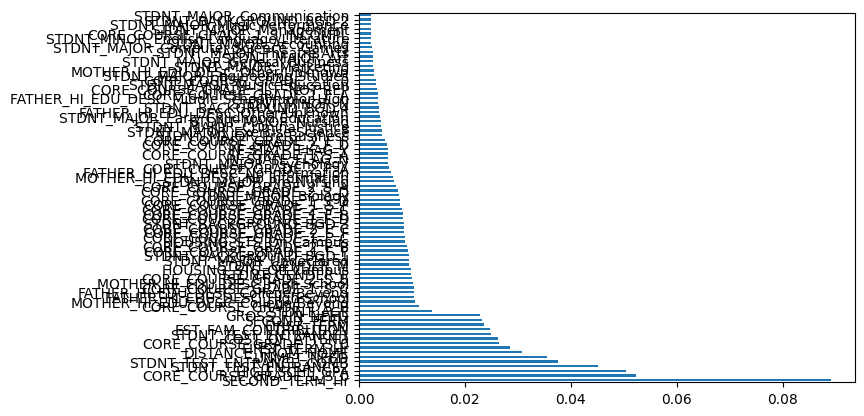

In [44]:
#import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = RandomForestClassifier()
model.fit(X,y)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(80).plot(kind='barh')
plt.show()

In [ ]:
print(X.shape)

(3400, 165)


In [38]:
# Apply min max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
# prompt: apply feature selection to choose the best 25 features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=50)
X_new = selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]
print(X_selected.shape)


Index(['SECOND_TERM_Hr', 'STDNT_BACKGROUND_BGD 1', 'STDNT_BACKGROUND_BGD 3',
       'STDNT_BACKGROUND_BGD 5', 'STDNT_BACKGROUND_BGD 6',
       'STDNT_BACKGROUND_BGD 7', 'IN_STATE_FLAG_N', 'INTERNATIONAL_STS_Y',
       'STDNT_MAJOR_Biology and Secondary Ed',
       'STDNT_MAJOR_Computer Science - Games', 'STDNT_MAJOR_Criminal Justice',
       'STDNT_MAJOR_Finance', 'STDNT_MAJOR_General Business',
       'STDNT_MAJOR_Health Science', 'STDNT_MAJOR_Joint Enrollment - Accel',
       'STDNT_MAJOR_Music Education', 'STDNT_MAJOR_Music Performance',
       'STDNT_MAJOR_Pre-Nursing', 'STDNT_MAJOR_Psychology',
       'STDNT_MAJOR_Theatre Arts', 'STDNT_MAJOR_Theatre Education',
       'STDNT_MAJOR_Undeclared', 'STDNT_MINOR_English Language/Literature',
       'STDNT_MINOR_Women's Studies', 'CORE_COURSE_GRADE_1_F_B',
       'CORE_COURSE_GRADE_1_F_D', 'CORE_COURSE_GRADE_1_F_F',
       'CORE_COURSE_GRADE_2_F_A', 'CORE_COURSE_GRADE_2_F_B',
       'CORE_COURSE_GRADE_2_F_C', 'CORE_COURSE_GRADE_2_F_D',
 

## split the data into training,  testing

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 44,shuffle=True )

print("x train shape is : ",X_train.shape)
print("x test shape is : ",X_test.shape)
print("y train shape is : ",y_train.shape)
print("y test shape is : ",y_test.shape)


x train shape is :  (2720, 50)
x test shape is :  (680, 50)
y train shape is :  (2720,)
y test shape is :  (680,)


In [41]:
# Apply smoten on X_train and y_train

from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)

# Apply the SMOTEENN to balance the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


Original class distribution: Counter({1: 2141, 0: 579})
Resampled class distribution: Counter({0: 1572, 1: 1066})
X_train_resampled shape: (2638, 50)
y_train_resampled shape: (2638,)


In [47]:
# apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree), ensemble (RF, Extratrees, bagging m XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models usign grid search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_resampled, y_resampled)
best_models['Voting'] = voting_clf

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.835479558392272
KNN: Best Parameters - {'n_neighbors': 3}, Best Score - 0.9476891783106204
Naive Bayes: Best Parameters - {}, Best Score - 0.7528520499108734
SVM: Best Parameters - {'C': 10, 'kernel': 'rbf'}, Best Score - 0.9363111666954171
Decision Tree: Best Parameters - {'max_depth': None}, Best Score - 0.8946250934391353
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.9533702777298603
Extra Trees: Best Parameters - {'n_estimators': 100}, Best Score - 0.959438790178828
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.9192570869990224
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.8407869012707723
Gradient Boosting: Best Parameters - {'n_estimators': 200}, Best Score - 0.8783192455867977
XGBoost: Best Parameters - {'learning_rate': 0.2, 'n_estimators': 200}, Best Score - 0.929492266114657
--- Logistic Regression ---
Accuracy: 0.7161764705882353
Classification Repo

In [49]:
X_train.shape

(2720, 50)

In [48]:
# apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree), ensemble (RF, Extratrees, bagging m XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models usign grid search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Best Parameters - {'C': 1}, Best Score - 0.8375
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.8227941176470589
Naive Bayes: Best Parameters - {}, Best Score - 0.8088235294117647
SVM: Best Parameters - {'C': 0.1, 'kernel': 'linear'}, Best Score - 0.832720588235294
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8216911764705882
Random Forest: Best Parameters - {'n_estimators': 100}, Best Score - 0.8147058823529412
Extra Trees: Best Parameters - {'n_estimators': 100}, Best Score - 0.7882352941176471
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.7981617647058823
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.8400735294117647
Gradient Boosting: Best Parameters - {'n_estimators': 50}, Best Score - 0.8297794117647058
XGBoost: Best Parameters - {'learning_rate': 0.01, 'n_estimators': 100}, Best Score - 0.8330882352941176
--- Logistic Regression ---
Accuracy: 0.8205882352941176
Classification Report:
       